In [426]:
!pip3 install wordcloud
!pip3 install transformers xgboost torch scikit-learn pandas tqdm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [427]:
import pandas as pd
import numpy as np

In [428]:
df = pd.read_csv('data.csv')
df

,annotation_id,annotator,comment,created_at,id,lead_time,rating,sentiment,updated_at,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Отрицательное
0,1.0,1.0,спасибо,2025-05-08T13:43:58.670350Z,2945792.0,229.477,5.0,"{""choices"": [""Понравилось выполнение заявки"", ...",2025-05-09T13:12:44.065760Z,1.0,0.0,0.0,0.0,1.0,0
1,2.0,1.0,спасибо!,2025-05-08T13:44:06.887197Z,3234340.0,7.589,5.0,"{""choices"": [""Понравилось выполнение заявки""]}",2025-05-09T10:57:27.209739Z,0.0,0.0,0.0,0.0,1.0,1
2,3.0,1.0,Отлично,2025-05-08T13:44:17.129499Z,3380332.0,16.082,5.0,"{""choices"": [""Понравилось выполнение заявки"", ...",2025-05-09T10:57:17.714712Z,1.0,0.0,0.0,0.0,1.0,0
3,4.0,1.0,Благодарю за оперативное решение проблемы !,2025-05-08T13:45:15.409884Z,3381812.0,56.595,5.0,Нравится скорость отработки заявок,2025-05-08T13:45:15.410883Z,0.0,0.0,0.0,0.0,0.0,0
4,5.0,1.0,Прекрасный специалист! Побольше таких,2025-05-08T13:45:22.315316Z,3461991.0,5.910,5.0,Нравится качество работы сотрудников,2025-05-08T13:45:22.315316Z,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,671.0,1.0,"долго, но приятно",2025-05-10T22:18:38.787028Z,3507812.0,2.096,5.0,Вопрос решен,2025-05-10T22:18:38.787028Z,0.0,0.0,0.0,0.0,0.0,0
2368,672.0,1.0,16.03.2024 г ребята установили кондиционер. ра...,2025-05-10T22:18:47.955163Z,3478532.0,6.796,5.0,"{""choices"": [""Нравится скорость отработки заяв...",2025-05-10T22:18:47.955163Z,1.0,1.0,1.0,1.0,1.0,0
2369,673.0,1.0,два дня мусоропровод. сегодня с утра тоже,2025-05-10T22:18:57.318493Z,3296403.0,7.427,5.0,Отрицательное,2025-05-10T22:18:57.318493Z,0.0,0.0,0.0,0.0,0.0,0
2370,674.0,1.0,отрегулировать дверь замки . для должного откр...,2025-05-10T22:19:02.362933Z,3165822.0,3.135,5.0,Отрицательное,2025-05-10T22:19:02.362933Z,0.0,0.0,0.0,0.0,0.0,0


In [429]:
df = df.dropna(subset=['sentiment'])

In [430]:
df.isna().sum()

annotation_id                           0
annotator                               0
comment                                 0
created_at                              0
id                                      0
lead_time                               0
rating                                  0
sentiment                               0
updated_at                              0
Вопрос решен                            0
Нравится качество выполнения заявки     0
Нравится качество работы сотрудников    0
Нравится скорость отработки заявок      0
Понравилось выполнение заявки           0
Отрицательное                           0
dtype: int64

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   annotation_id                         2372 non-null   float64
 1   annotator                             2372 non-null   float64
 2   comment                               2372 non-null   object 
 3   created_at                            2372 non-null   object 
 4   id                                    2372 non-null   float64
 5   lead_time                             2372 non-null   float64
 6   rating                                2372 non-null   float64
 7   sentiment                             2372 non-null   object 
 8   updated_at                            2372 non-null   object 
 9   Вопрос решен                          2372 non-null   float64
 10  Нравится качество выполнения заявки   2372 non-null   float64
 11  Нравится качество

In [432]:
df

,annotation_id,annotator,comment,created_at,id,lead_time,rating,sentiment,updated_at,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Отрицательное
0,1.0,1.0,спасибо,2025-05-08T13:43:58.670350Z,2945792.0,229.477,5.0,"{""choices"": [""Понравилось выполнение заявки"", ...",2025-05-09T13:12:44.065760Z,1.0,0.0,0.0,0.0,1.0,0
1,2.0,1.0,спасибо!,2025-05-08T13:44:06.887197Z,3234340.0,7.589,5.0,"{""choices"": [""Понравилось выполнение заявки""]}",2025-05-09T10:57:27.209739Z,0.0,0.0,0.0,0.0,1.0,1
2,3.0,1.0,Отлично,2025-05-08T13:44:17.129499Z,3380332.0,16.082,5.0,"{""choices"": [""Понравилось выполнение заявки"", ...",2025-05-09T10:57:17.714712Z,1.0,0.0,0.0,0.0,1.0,0
3,4.0,1.0,Благодарю за оперативное решение проблемы !,2025-05-08T13:45:15.409884Z,3381812.0,56.595,5.0,Нравится скорость отработки заявок,2025-05-08T13:45:15.410883Z,0.0,0.0,0.0,0.0,0.0,0
4,5.0,1.0,Прекрасный специалист! Побольше таких,2025-05-08T13:45:22.315316Z,3461991.0,5.910,5.0,Нравится качество работы сотрудников,2025-05-08T13:45:22.315316Z,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,671.0,1.0,"долго, но приятно",2025-05-10T22:18:38.787028Z,3507812.0,2.096,5.0,Вопрос решен,2025-05-10T22:18:38.787028Z,0.0,0.0,0.0,0.0,0.0,0
2368,672.0,1.0,16.03.2024 г ребята установили кондиционер. ра...,2025-05-10T22:18:47.955163Z,3478532.0,6.796,5.0,"{""choices"": [""Нравится скорость отработки заяв...",2025-05-10T22:18:47.955163Z,1.0,1.0,1.0,1.0,1.0,0
2369,673.0,1.0,два дня мусоропровод. сегодня с утра тоже,2025-05-10T22:18:57.318493Z,3296403.0,7.427,5.0,Отрицательное,2025-05-10T22:18:57.318493Z,0.0,0.0,0.0,0.0,0.0,0
2370,674.0,1.0,отрегулировать дверь замки . для должного откр...,2025-05-10T22:19:02.362933Z,3165822.0,3.135,5.0,Отрицательное,2025-05-10T22:19:02.362933Z,0.0,0.0,0.0,0.0,0.0,0


In [433]:
import pandas as pd
import json
from ast import literal_eval

all_labels = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки",
    "Отрицательное"
]

for label in all_labels:
    df[label] = 0

def process_sentiment(row):
    sentiment = row['sentiment']
    
    try:
        if isinstance(sentiment, str):
            try:
                data = literal_eval(sentiment)
                if isinstance(data, dict) and 'choices' in data:
                    labels = data['choices']
                else:
                    labels = [str(data)] if data else []
            except:
                labels = [sentiment]
        elif isinstance(sentiment, dict):
            labels = sentiment.get('choices', [])
        else:
            labels = [str(sentiment)]
    except:
        labels = [str(sentiment)]
    
    for label in labels:
        if label in all_labels:
            row[label] = 1
        else:
            for existing_label in all_labels:
                if label.lower() == existing_label.lower():
                    row[existing_label] = 1
                    break
    
    return row

df = df.apply(process_sentiment, axis=1)
df

,annotation_id,annotator,comment,created_at,id,lead_time,rating,sentiment,updated_at,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Отрицательное
0,1.0,1.0,спасибо,2025-05-08T13:43:58.670350Z,2945792.0,229.477,5.0,"{""choices"": [""Понравилось выполнение заявки"", ...",2025-05-09T13:12:44.065760Z,1,0,0,0,1,0
1,2.0,1.0,спасибо!,2025-05-08T13:44:06.887197Z,3234340.0,7.589,5.0,"{""choices"": [""Понравилось выполнение заявки""]}",2025-05-09T10:57:27.209739Z,0,0,0,0,1,0
2,3.0,1.0,Отлично,2025-05-08T13:44:17.129499Z,3380332.0,16.082,5.0,"{""choices"": [""Понравилось выполнение заявки"", ...",2025-05-09T10:57:17.714712Z,1,0,0,0,1,0
3,4.0,1.0,Благодарю за оперативное решение проблемы !,2025-05-08T13:45:15.409884Z,3381812.0,56.595,5.0,Нравится скорость отработки заявок,2025-05-08T13:45:15.410883Z,0,0,0,1,0,0
4,5.0,1.0,Прекрасный специалист! Побольше таких,2025-05-08T13:45:22.315316Z,3461991.0,5.910,5.0,Нравится качество работы сотрудников,2025-05-08T13:45:22.315316Z,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,671.0,1.0,"долго, но приятно",2025-05-10T22:18:38.787028Z,3507812.0,2.096,5.0,Вопрос решен,2025-05-10T22:18:38.787028Z,1,0,0,0,0,0
2368,672.0,1.0,16.03.2024 г ребята установили кондиционер. ра...,2025-05-10T22:18:47.955163Z,3478532.0,6.796,5.0,"{""choices"": [""Нравится скорость отработки заяв...",2025-05-10T22:18:47.955163Z,1,1,1,1,1,0
2369,673.0,1.0,два дня мусоропровод. сегодня с утра тоже,2025-05-10T22:18:57.318493Z,3296403.0,7.427,5.0,Отрицательное,2025-05-10T22:18:57.318493Z,0,0,0,0,0,1
2370,674.0,1.0,отрегулировать дверь замки . для должного откр...,2025-05-10T22:19:02.362933Z,3165822.0,3.135,5.0,Отрицательное,2025-05-10T22:19:02.362933Z,0,0,0,0,0,1


In [434]:
import pandas as pd
import json
from ast import literal_eval

labels = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки",
    "Отрицательное"
]

for label in labels:
    if label not in df.columns:
        df[label] = 0

def parse_sentiment(sentiment):
    if pd.isna(sentiment):
        return []
    if isinstance(sentiment, str):
        try:
            data = literal_eval(sentiment)
            if isinstance(data, dict):
                return data.get("choices", [])
            return [str(data)]
        except:
            return [sentiment]
    elif isinstance(sentiment, dict):
        return sentiment.get("choices", [])
    else:
        return [str(sentiment)]

for index, row in df.iterrows():
    sentiment_labels = parse_sentiment(row["sentiment"])
    for label in labels:
        if label in sentiment_labels:
            df.at[index, label] = 1

In [435]:
label_counts = df[labels].sum().sort_values(ascending=False)
print(label_counts)

Вопрос решен                            1233
Нравится скорость отработки заявок       579
Понравилось выполнение заявки            577
Нравится качество работы сотрудников     376
Отрицательное                            262
Нравится качество выполнения заявки      130
dtype: int64


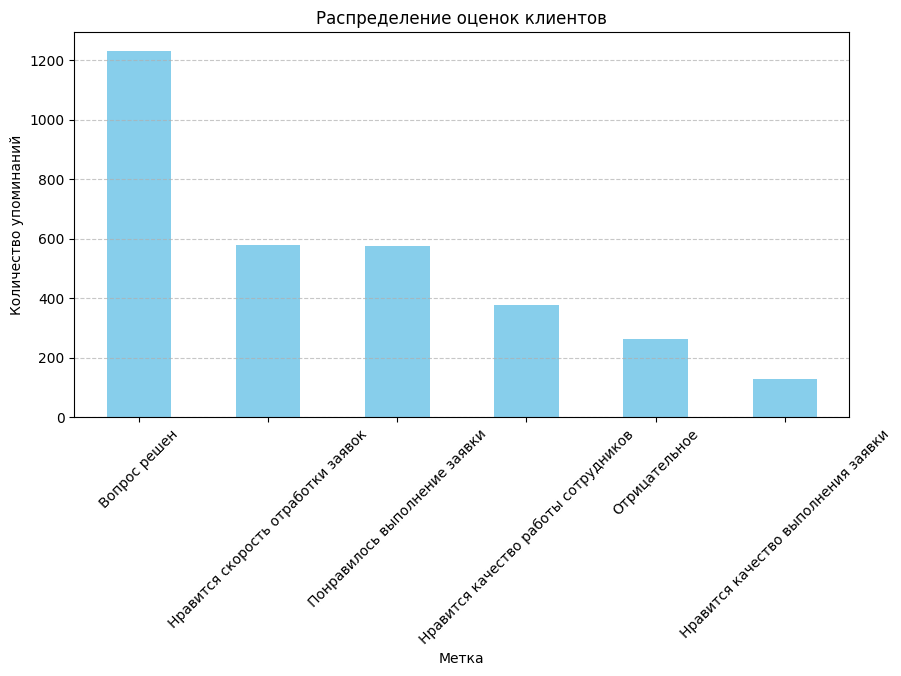

In [436]:
import matplotlib.pyplot as plt

label_counts.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title("Распределение оценок клиентов")
plt.ylabel("Количество упоминаний")
plt.xlabel("Метка")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [437]:
df.to_csv("df.csv", index=False)

In [438]:
df.describe()

,annotation_id,annotator,id,lead_time,rating,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Отрицательное
count,2372.000000,2372.0,2.372000e+03,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000
mean,706.737774,1.0,4.046167e+06,13.850452,4.954890,0.519815,0.054806,0.158516,0.244098,0.243255,0.110455
std,487.078887,0.0,1.651233e+05,63.121182,0.382103,0.499713,0.227649,0.365301,0.429642,0.429138,0.313523
min,1.000000,1.0,2.945792e+06,1.165000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.750000,1.0,3.912365e+06,2.573500,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,596.000000,1.0,3.953161e+06,4.048000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1109.250000,1.0,4.203986e+06,8.437500,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1702.000000,1.0,4.237692e+06,2207.779000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


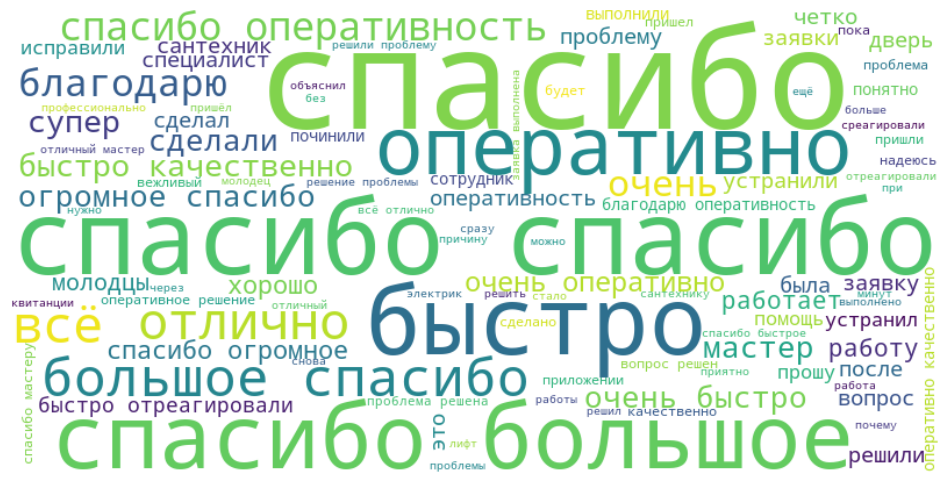

Самые частые слова: [('спасибо', 1336), ('быстро', 358), ('большое', 272), ('оперативно', 258), ('очень', 179), ('оперативность', 136), ('отлично', 109), ('благодарю', 109), ('всё', 107), ('мастер', 93), ('качественно', 89), ('огромное', 80), ('вопрос', 70), ('работу', 64), ('супер', 56), ('решили', 52), ('сделали', 51), ('проблему', 47), ('хорошо', 42), ('решение', 41)]


In [439]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

RUSSIAN_STOP_WORDS = {
    'и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то',
    'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за',
    'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще',
    'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли',
    'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь',
    'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей',
    'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя'
}

STOP_WORDS = ENGLISH_STOP_WORDS.union(RUSSIAN_STOP_WORDS)

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'[^а-яА-ЯёЁa-zA-Z\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in STOP_WORDS and len(word) > 2]
    return ' '.join(words)

all_comments = ' '.join(df['comment'].astype(str).apply(preprocess_text))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100,
    stopwords=STOP_WORDS,  # передаем стоп-слова напрямую в WordCloud
    contour_width=3,
    contour_color='steelblue'
).generate(all_comments)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

word_freq = Counter(all_comments.split())
print("Самые частые слова:", word_freq.most_common(20))

In [440]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin


class CommentClassifier(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.pipeline = make_pipeline(
            TfidfVectorizer(max_features=5000, ngram_range=(1, 2)),
            MultiOutputClassifier(LogisticRegression(max_iter=1000))
        )
        self.target_columns = None

    def fit(self, X, y):
        self.target_columns = y.columns.tolist()
        self.pipeline.fit(X, y)
        return self

    def predict(self, X):
        return self.pipeline.predict(X)

    def predict_proba(self, X):
        return np.array([
            est.predict_proba(self.pipeline.named_steps['tfidf'].transform(X)) 
            for est in self.pipeline.named_steps['multioutputclassifier'].estimators_
        ]).transpose(1, 0, 2)

    def get_feature_names(self):
        return self.pipeline.named_steps['tfidf'].get_feature_names_out()

    def get_target_names(self):
        return self.target_columns

df['comment'] = df['comment'].fillna("")

target_columns = [
    'Нравится скорость отработки заявок',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Понравилось выполнение заявки',
    'Вопрос решен',
    'Отрицательное'
]

X = df['comment']
y = df[target_columns].fillna(0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CommentClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_columns, zero_division=0))


test_comments = [
    "Спасибо, быстро решили проблему!",
    "Сотрудник не помог и был груб",
    "Очень довольна качеством работы и скоростью",
    "Не решено, очень плохо"
]

predictions = model.predict(test_comments)

results = pd.DataFrame(predictions, columns=model.get_target_names(), index=test_comments)
print("\nПредсказания:")
print(results)


                                      precision    recall  f1-score   support

  Нравится скорость отработки заявок       0.78      0.55      0.64       128
 Нравится качество выполнения заявки       0.00      0.00      0.00        27
Нравится качество работы сотрудников       0.94      0.22      0.35        79
       Понравилось выполнение заявки       0.62      0.44      0.51       119
                        Вопрос решен       0.75      0.68      0.71       241
                       Отрицательное       1.00      0.41      0.58        46

                           micro avg       0.74      0.50      0.60       640
                           macro avg       0.68      0.38      0.47       640
                        weighted avg       0.74      0.50      0.58       640
                         samples avg       0.51      0.51      0.49       640


Предсказания:
                                             Нравится скорость отработки заявок  \
Спасибо, быстро решили проблему!         

In [441]:
predicted_df = pd.DataFrame(y_pred, columns=model.get_target_names())

# Объединяем с комментариями
results_df = pd.DataFrame(X_test).reset_index(drop=True)
results_df.columns = ['comment']
results_df = pd.concat([results_df, predicted_df.reset_index(drop=True)], axis=1)

# Сохраняем в файл
results_df.to_csv("predicted_comments.csv", index=False)

In [442]:
result_df = pd.read_csv("predicted_comments.csv")
result_df

,comment,Нравится скорость отработки заявок,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Понравилось выполнение заявки,Вопрос решен,Отрицательное
0,быстро,1,0,0,0,0,0
1,"все отлично, спасибо",0,0,0,1,1,0
2,спасибо),0,0,0,1,1,0
3,"быстро отреагировали на заявку , сразу решили ...",1,0,0,0,0,0
4,"Среагировали быстро, благодарю",1,0,0,0,0,0
...,...,...,...,...,...,...,...
470,Алексей профессионал в своем деле! Быстро наше...,0,0,0,0,0,0
471,спасибо,0,0,0,1,1,0
472,спасибо большое,0,0,0,1,1,0
473,сантехник андрей качественно выполнил свою раб...,0,0,1,0,0,0


In [443]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.preprocessing import MultiLabelBinarizer
# import joblib

# categories = [
#     'Нравится скорость отработки заявок',
#     'Нравится качество выполнения заявки',
#     'Нравится качество работы сотрудников',
#     'Понравилось выполнение заявки',
#     'Вопрос решен',
#     'Отрицательное'
# ]

# df = df.dropna(subset=["comment"])

# X = df["comment"]
# y = df[categories]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = Pipeline([
#     ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
#     ("clf", OneVsRestClassifier(LogisticRegression(solver="liblinear")))
# ])

# model.fit(X_train, y_train)

# # # Сохраним модель
# # joblib.dump(model, "comment_classifier.pkl")

# # Пример предсказания
# example_comments = [
#     "Спасибо за быстрое решение проблемы!",
#     "Очень вежливый мастер, всё сделал хорошо",
#     "Ничего не сделали, ужасное отношение"
# ]

# preds = model.predict(example_comments)

# # Распечатаем предсказания
# for comment, pred in zip(example_comments, preds):
#     labels = [cat for cat, flag in zip(categories, pred) if flag == 1]
#     print(f"Комментарий: {comment}\nКатегории: {labels}\n")


In [444]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, BertTokenizer, BertModel
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch import nn
from tqdm import tqdm



# === Конфигурация ===
MODEL_NAME = "DeepPavlov/rubert-base-cased"
MAX_LEN = 128
BATCH_SIZE = 16
EPOCHS = 3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Загрузка данных ===
df['comment'] = df['comment'].fillna("")

target_columns = [
    'Нравится скорость отработки заявок',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Понравилось выполнение заявки',
    'Вопрос решен',
    'Отрицательное'
]

df[target_columns] = df[target_columns].fillna(0).astype(int)

X_train, X_val, y_train, y_val = train_test_split(
    df['comment'], df[target_columns], test_size=0.2, random_state=42
)

# === Токенизатор BERT ===
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)


# === Класс для датасета ===
class CommentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts.tolist()
        self.labels = labels.values
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        encoding = self.tokenizer(
            self.texts[item],
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[item], dtype=torch.float)
        }


train_dataset = CommentDataset(X_train, y_train, tokenizer, MAX_LEN)
val_dataset = CommentDataset(X_val, y_val, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)


# === Модель на основе BERT ===
class BERTClassifier(nn.Module):
    def __init__(self, model_name, num_labels):
        super(BERTClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled = outputs.pooler_output
        return torch.sigmoid(self.classifier(self.dropout(pooled)))


model = BERTClassifier(MODEL_NAME, num_labels=len(target_columns)).to(DEVICE)
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.BCELoss()


# === Функции обучения и валидации ===
def train_epoch(model, data_loader, loss_fn, optimizer):
    model.train()
    total_loss = 0
    for batch in tqdm(data_loader):
        input_ids = batch['input_ids'].to(DEVICE)
        attention_mask = batch['attention_mask'].to(DEVICE)
        labels = batch['labels'].to(DEVICE)

        outputs = model(input_ids, attention_mask)
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()
    return total_loss / len(data_loader)


def eval_model(model, data_loader):
    model.eval()
    preds = []
    trues = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(DEVICE)
            attention_mask = batch['attention_mask'].to(DEVICE)
            labels = batch['labels'].cpu().numpy()
            outputs = model(input_ids, attention_mask).cpu().numpy()
            preds.append(outputs)
            trues.append(labels)
    return np.vstack(trues), np.vstack(preds)


# === Обучение ===
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")
    train_loss = train_epoch(model, train_loader, loss_fn, optimizer)
    print(f"Train Loss: {train_loss:.4f}")

# === Валидация ===
y_true, y_pred = eval_model(model, val_loader)
# Применяем порог 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Гарантируем хотя бы одну метку
for i in range(y_pred_binary.shape[0]):
    if y_pred_binary[i].sum() == 0:
        # Назначим метку с максимальной вероятностью
        max_idx = y_pred[i].argmax()
        y_pred_binary[i, max_idx] = 1

print("\nClassification Report:")
print(classification_report(y_true, y_pred_binary, target_names=target_columns, zero_division=0))

print("\nROC-AUC по классам:")
for i, col in enumerate(target_columns):
    score = roc_auc_score(y_true[:, i], y_pred[:, i])
    print(f"{col}: {score:.4f}")

# Средний ROC-AUC (macro)
macro_auc = roc_auc_score(y_true, y_pred, average='macro')
print(f"\nMacro ROC-AUC: {macro_auc:.4f}")


Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



Epoch 1/3


100%|██████████| 119/119 [12:43<00:00,  6.41s/it]


Train Loss: 0.4307

Epoch 2/3


100%|██████████| 119/119 [07:05<00:00,  3.57s/it]


Train Loss: 0.3077

Epoch 3/3


100%|██████████| 119/119 [07:01<00:00,  3.54s/it]


Train Loss: 0.2643

Classification Report:
                                      precision    recall  f1-score   support

  Нравится скорость отработки заявок       0.71      0.76      0.73       128
 Нравится качество выполнения заявки       0.00      0.00      0.00        27
Нравится качество работы сотрудников       0.86      0.85      0.85        79
       Понравилось выполнение заявки       0.72      0.45      0.56       119
                        Вопрос решен       0.74      0.71      0.73       241
                       Отрицательное       0.91      0.85      0.88        46

                           micro avg       0.76      0.67      0.71       640
                           macro avg       0.66      0.60      0.63       640
                        weighted avg       0.73      0.67      0.69       640
                         samples avg       0.76      0.70      0.70       640


ROC-AUC по классам:
Нравится скорость отработки заявок: 0.9063
Нравится качество выполнения зая

In [453]:
new_comments = ["Очень доволен скоростью", "Проблема не решена", "Спасибо за помощь", "Быстро", "Мастер плохо справился", "Ничего не сделали, ужасное отношение", "Ужасно", "Выполнили отлично, оперативно, качественно"]
df_test = pd.DataFrame({'comment': new_comments})


In [454]:
test_dataset = CommentDataset(df_test['comment'], 
                              pd.DataFrame([[0]*len(target_columns)]*len(df_test), columns=target_columns), 
                              tokenizer, 
                              MAX_LEN)

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)


In [455]:
model.eval()
all_preds = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(DEVICE)
        attention_mask = batch['attention_mask'].to(DEVICE)
        outputs = model(input_ids, attention_mask).cpu().numpy()
        all_preds.append(outputs)

# Объединяем все батчи
pred_probs = np.vstack(all_preds)

# Бинаризуем при необходимости (порог 0.5)
pred_labels = (pred_probs > 0.5).astype(int)


In [456]:
# В виде DataFrame
pred_df = pd.DataFrame(pred_labels, columns=target_columns)
result_df = pd.concat([df_test['comment'].reset_index(drop=True), pred_df], axis=1)

result_df


,comment,Нравится скорость отработки заявок,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Понравилось выполнение заявки,Вопрос решен,Отрицательное
0,Очень доволен скоростью,0,0,0,0,0,0
1,Проблема не решена,0,0,0,0,0,1
2,Спасибо за помощь,0,0,0,0,1,0
3,Быстро,1,0,0,0,1,0
4,Мастер плохо справился,0,0,1,0,0,0
5,"Ничего не сделали, ужасное отношение",0,0,0,0,0,1
6,Ужасно,0,0,0,0,1,0
7,"Выполнили отлично, оперативно, качественно",1,0,0,0,0,0
